Initial Dataset:
   Age  Income  Student  Credit_Rate  Default
0   58   74131        1            1        1
1   48   90263        1            0        0
2   34   46023        1            0        1
3   27   71090        1            0        1
4   40   97221        0            0        0
5   58   94820        0            0        1
6   38   30769        1            1        0
7   42   89735        1            1        1
8   30   92955        1            1        0
9   30   94925        0            1        1

Initial Weights: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


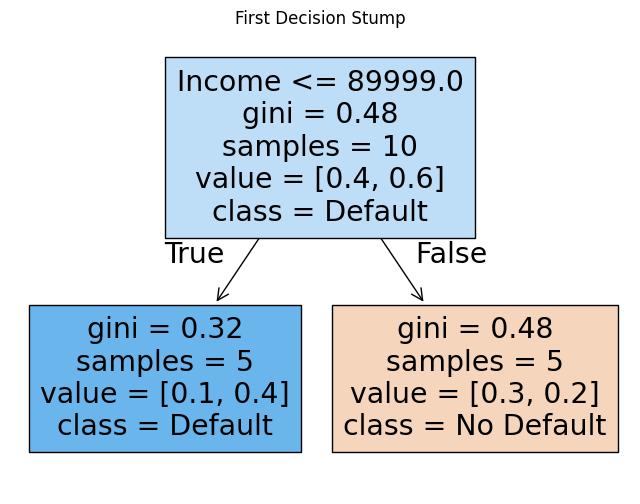


Weighted Error: 0.30000000000000004

Model Weight (Alpha): 0.4236489301936017

Updated Weights: 0    0.055556
1    0.129630
2    0.055556
3    0.055556
4    0.129630
5    0.129630
6    0.129630
7    0.055556
8    0.129630
9    0.129630
Name: Default, dtype: float64

Resampled Dataset:
   Age  Income  Student  Credit_Rate  Default
0   58   94820        0            0        1
1   30   92955        1            1        0
2   38   30769        1            1        0
3   58   94820        0            0        1
4   58   74131        1            1        1
5   30   94925        0            1        1
6   38   30769        1            1        0
7   40   97221        0            0        0
8   58   74131        1            1        1
9   34   46023        1            0        1


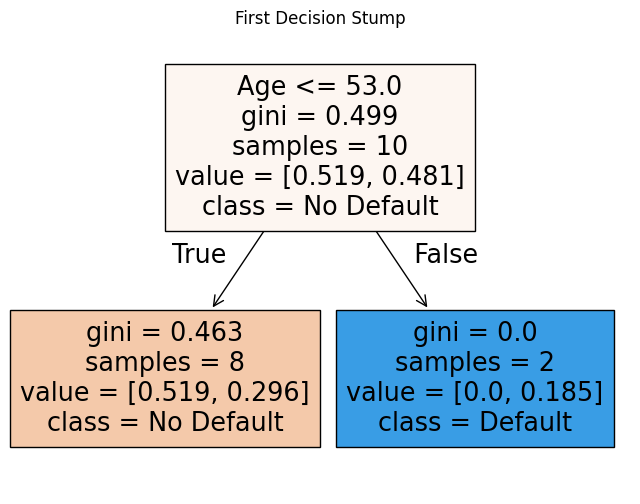


Iteration 1 - Weighted Error: 0.2962962962962963, Alpha: 0.43249871874330226
Updated Weights: 0    0.026201
1    0.145197
2    0.062227
3    0.062227
4    0.145197
5    0.061135
6    0.145197
7    0.062227
8    0.145197
9    0.145197
Name: Default, dtype: float64


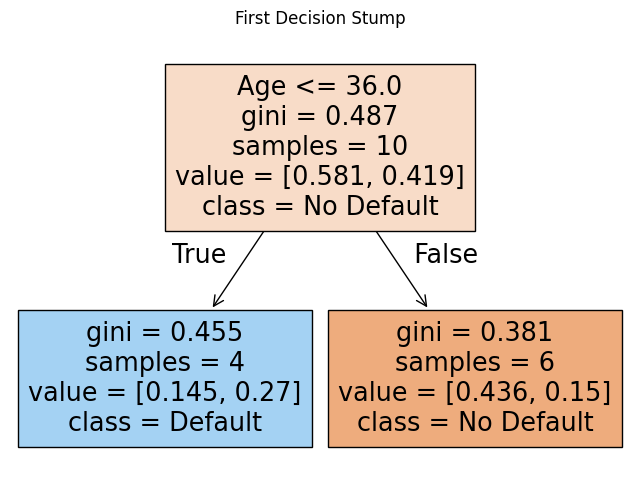


Iteration 2 - Weighted Error: 0.2947598253275109, Alpha: 0.4361887723921136
Updated Weights: 0    0.031079
1    0.172227
2    0.030850
3    0.030850
4    0.172227
5    0.072517
6    0.172227
7    0.073812
8    0.172227
9    0.071984
Name: Default, dtype: float64


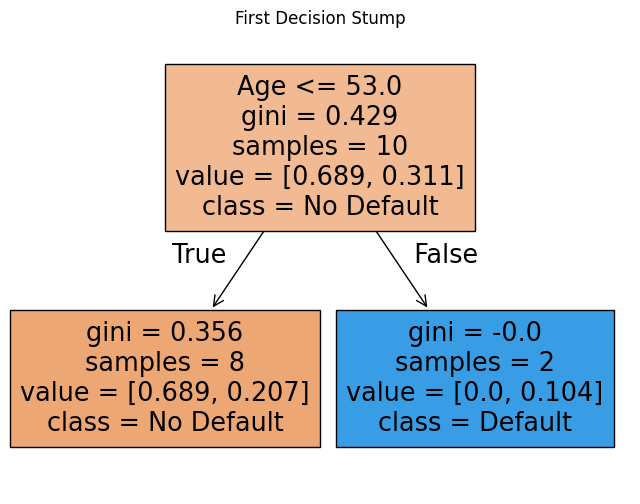


Iteration 3 - Weighted Error: 0.20749542961608775, Alpha: 0.6700444796495696
Updated Weights: 0    0.008811
1    0.186488
2    0.033405
3    0.033405
4    0.186488
5    0.020559
6    0.186488
7    0.079924
8    0.186488
9    0.077944
Name: Default, dtype: float64


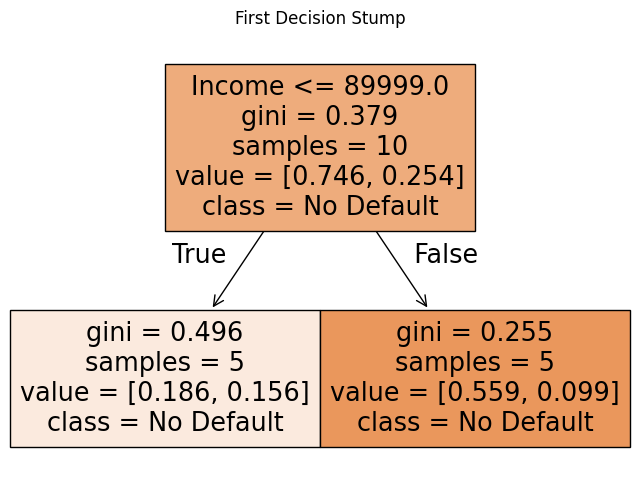


Iteration 4 - Weighted Error: 0.25404639608751345, Alpha: 0.5385732465115569
Updated Weights: 0    0.008811
1    0.186488
2    0.033405
3    0.033405
4    0.186488
5    0.020559
6    0.186488
7    0.079924
8    0.186488
9    0.077944
Name: Default, dtype: float64


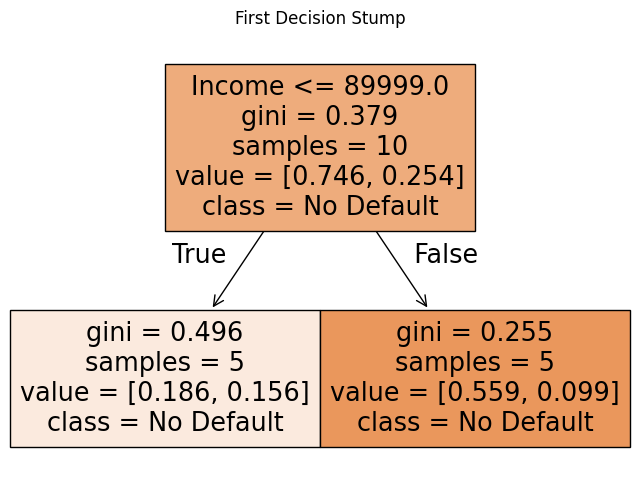


Iteration 5 - Weighted Error: 0.2540463960875135, Alpha: 0.5385732465115568
Updated Weights: 0    0.008811
1    0.186488
2    0.033405
3    0.033405
4    0.186488
5    0.020559
6    0.186488
7    0.079924
8    0.186488
9    0.077944
Name: Default, dtype: float64

Final Predictions: [1. 0. 1. 1. 0. 1. 0. 0. 1. 1.]

Final Model Accuracy: 0.8


In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def gini_impurity(y):
    """Calculate Gini Impurity"""
    probs = np.bincount(y) / len(y)
    return 1 - np.sum(probs ** 2)

# Step 1: Create a small dataset
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(20, 60, 10),
    'Income': np.random.randint(30000, 100000, 10),
    'Student': np.random.choice([0, 1], 10),  # 0: No, 1: Yes
    'Credit_Rate': np.random.choice([0, 1], 10),  # 0: below avearge, 1: Above average
    'Default': np.random.choice([0, 1], 10)  # Target variable
})
print("Initial Dataset:")
print(df)

# Step 2: Initialize weights equally
n = len(df)
weights = np.ones(n) / n
print("\nInitial Weights:", weights)

# Step 3: Train the first decision stump
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(df.drop(columns=['Default']), df['Default'], sample_weight=weights)
preds = stump.predict(df.drop(columns=['Default']))

plt.figure(figsize=(8, 6))
plot_tree(stump, feature_names=df.drop(columns=['Default']).columns, class_names=["No Default", "Default"], filled=True)
plt.title("First Decision Stump")
plt.show()

# Step 4: Compute weighted error
epsilon = np.sum(weights * (preds != df['Default']))
print("\nWeighted Error:", epsilon)

# Step 5: Compute model weight (alpha)
alpha = 0.5 * np.log((1 - epsilon) / max(epsilon, 1e-10))  # Avoid division by zero
print("\nModel Weight (Alpha):", alpha)

# Step 6: Update sample weights
weights *= np.exp(-alpha * df['Default'] * preds + alpha * (1 - df['Default'] * preds))
weights /= np.sum(weights)
print("\nUpdated Weights:", weights)

# Step 7: Create a new weighted dataset by resampling
indices = np.random.choice(range(n), size=n, p=weights)
df_resampled = df.iloc[indices].reset_index(drop=True)
print("\nResampled Dataset:")
print(df_resampled)

# Step 8: Repeat the process for additional stumps
stumps = []
alphas = []
for i in range(5):  # Run for 5 boosting rounds
    stump = DecisionTreeClassifier(max_depth=1)
    stump.fit(df.drop(columns=['Default']), df['Default'], sample_weight=weights)
    preds = stump.predict(df.drop(columns=['Default']))

    plt.figure(figsize=(8, 6))
    plot_tree(stump, feature_names=df.drop(columns=['Default']).columns, class_names=["No Default", "Default"], filled=True)
    plt.title("First Decision Stump")
    plt.show()
    
    epsilon = np.sum(weights * (preds != df['Default']))
    alpha = 0.5 * np.log((1 - epsilon) / max(epsilon, 1e-10))
    
    weights *= np.exp(-alpha * df['Default'] * preds + alpha * (1 - df['Default'] * preds))
    weights /= np.sum(weights)
    
    stumps.append(stump)
    alphas.append(alpha)
    
    print(f"\nIteration {i+1} - Weighted Error: {epsilon}, Alpha: {alpha}")
    print("Updated Weights:", weights)

# Step 9: Final Prediction Formula
final_preds = np.zeros(n)
for stump, alpha in zip(stumps, alphas):
    final_preds += alpha * stump.predict(df.drop(columns=['Default']))
final_preds = np.sign(final_preds)  # Convert to binary classification
print("\nFinal Predictions:", final_preds)

# Accuracy of the AdaBoost classifier
accuracy = accuracy_score(df['Default'], final_preds)
print("\nFinal Model Accuracy:", accuracy)


In [7]:
data

,Age,Income,Student,Credit_Rate,Default,Weight
0,25,50000,1,2,1,NaN
1,45,60000,0,1,0,NaN
2,35,75000,0,2,0,NaN
3,50,80000,0,1,0,NaN
4,23,20000,1,2,1,NaN
5,40,54000,0,1,0,NaN
6,60,100000,0,3,0,NaN
7,48,70000,1,1,1,NaN
8,33,65000,1,2,1,NaN
9,55,72000,0,3,0,NaN
